In [3]:
import saspy
sas = saspy.SASsession()

Using SAS Config named: oda
SAS Connection established. Subprocess id is 11404



### data

In [5]:
sas.submitLST(f"""
    data cars;
        set sashelp.cars;
        if strip(model) in ('TSX 4dr', 'TL 4dr', 'MDX') then do;
            msrp = .;
            invoice = .;
            mpg_city = .;
            mpg_highway = .;
        end;
        if strip(model) in ('3.5 RL 4dr') then do;
            type = '';
            origin = '';
        end;
        if msrp > 32762 then expensive = 1;
        else expensive = 0;
        keep model type origin msrp invoice mpg_city mpg_highway expensive;
    run;
              
    proc sort data=cars nodupkey;
        by model;
    run;

    proc print data=cars (obs=5);
    run;
""")

Obs,Model,Type,Origin,MSRP,Invoice,MPG_City,MPG_Highway,expensive
1,3.5 RL 4dr,,,"$43,755","$39,014",18,24,1
2,3.5 RL w/Navigation 4dr,Sedan,Asia,"$46,100","$41,100",18,24,1
3,300M 4dr,Sedan,USA,"$29,865","$27,797",18,27,0
4,300M Special Edition 4dr,Sedan,USA,"$33,295","$30,884",18,27,1
5,325Ci 2dr,Sedan,Europe,"$30,795","$28,245",20,29,0


### analysis


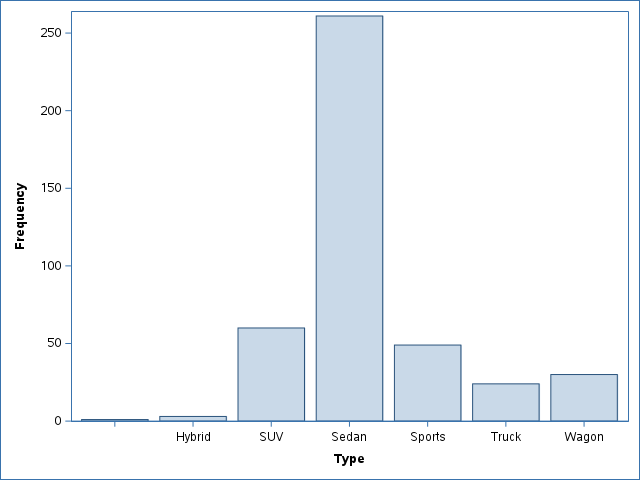

In [6]:
# v or hbar for bar plot
# missing
sas.submitLST(f"""
    proc sgplot data=cars;
        vbar type / missing;
    run;
""")


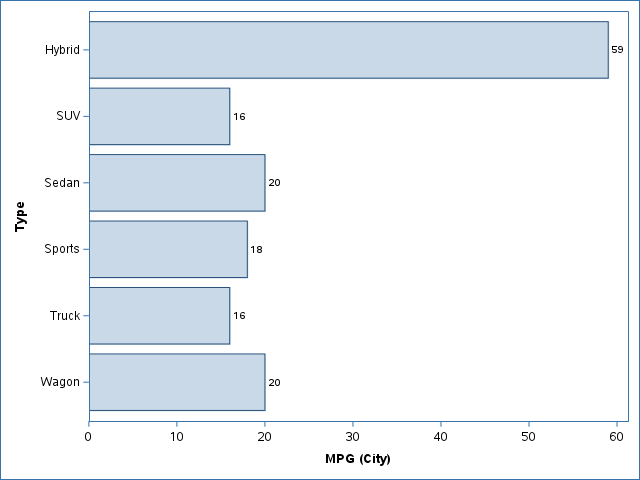

In [16]:
# response and stat
sas.submitLST(f"""
    proc sgplot data=sashelp.cars;
        hbar type / missing response=mpg_city stat=median datalabel;
    run;
""")


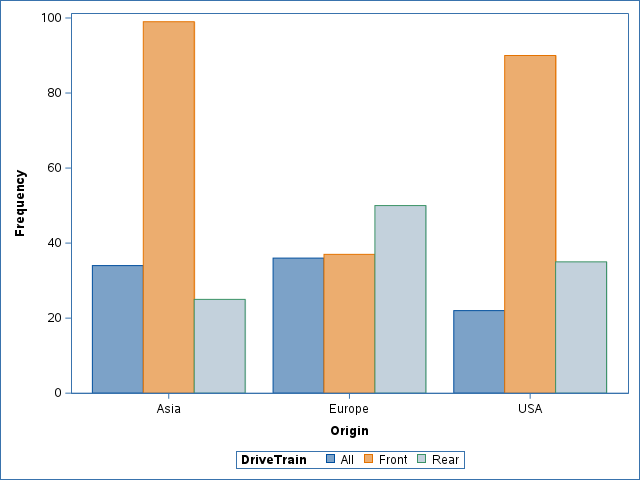

In [10]:
# group and group display
sas.submitLST(f"""
    proc sgplot data=sashelp.cars;
        vbar origin / group=driveTrain groupdisplay=cluster;
    run;
""")


In [3]:
sas.submitLST(f"""
    proc freq data=sashelp.cars;
        tabels origin * driveTrain / nocum norow nocol;
    run;
""")


### other options


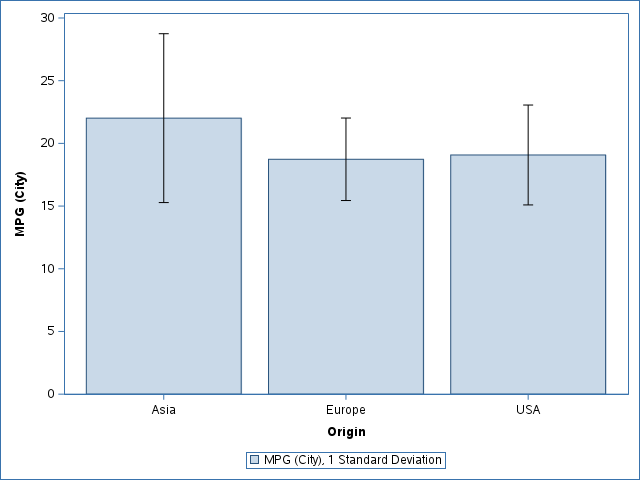

In [23]:
# limitstat stddev
sas.submitLST(
f"""
proc sgplot data=sashelp.cars;
    var origin / response=mpg_city stat=mean limitstat=stddev;
run;
""")


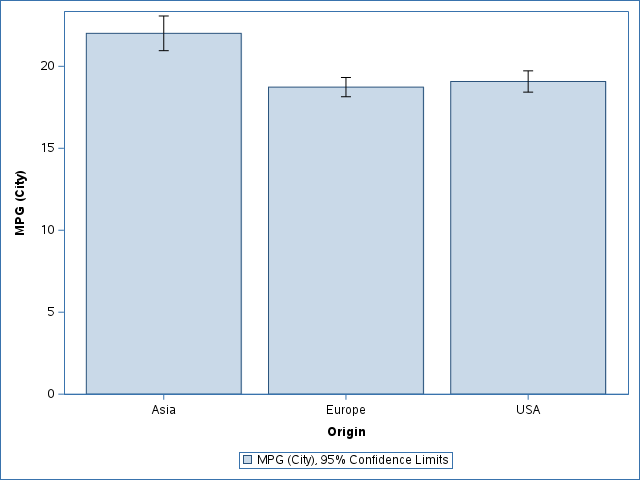

In [24]:
# limitstat clm
sas.submitLST(
f"""
proc sgplot data=sashelp.cars;
    var origin / response=mpg_city stat=mean limitstat=clm;
run;
""")